In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rd


In [9]:
data=[]
for i in range(15):
    data.append(np.random.randint(low=1, high=10, size=2))
data = pd.DataFrame(data)
data.columns =['col1','col2']
data

,col1,col2
0,1,8
1,4,1
2,7,1
3,8,6
4,4,3
5,7,8
6,9,5
7,6,7
8,4,3
9,8,6


In [17]:
#Distance between two point
def distance(x,y):
    x=x[0]
    y=y[0]
    dis=0    
    for i in range(len(x)):
        dis+=(x[i]-y[i])**2
    return math.sqrt(dis)
#find row and column of minimum elements of distance matrix
def minimum_ele(d_matrix):
    min_list=[]
    for i in range(len(d_matrix)):
        temp=[]
        for j in range(len(d_matrix)):
            if i!=j:
                if d_matrix[i][j]==0:
                    return i,j
                temp.append(d_matrix[i][j])
        min_list.append(min(temp))
    row=min_list.index(min(min_list))
    col=d_matrix[row].index(min(min_list))   
    return row,col


In [18]:
cluster=[]
c=[]
for i in range(len(data)):
    c.append([i])
while len(c)>2:  #if no of cluster is 2 then stop
    dis_matrix=[]
    for i in range(len(c)):
        temp=[]
        for j in range(len(c)):
            if i==j:
                temp.append(0)
            else:
                if len(c[i])==len(c[j])==1:
                    temp.append(distance(data.iloc[i:i+1,:].values,data.iloc[j:j+1,:].values))                
                else:
                    t=[]
                    p=c[i]
                    q=c[j]
                    for k in range(len(p)):
                        for l in range(len(q)):
                            t.append(distance(data.iloc[p[k]:p[k]+1,:].values,data.iloc[q[l]:q[l]+1,:].values))
                    temp.append(min(t))
        dis_matrix.append(temp)
    d_matrix=dis_matrix.copy()
    row,col=minimum_ele(d_matrix)   
    c[row]=c[row]+c[col]
    c.pop(col)
    new=c.copy()
    cluster.append(new)

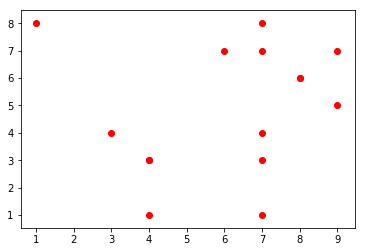

In [19]:
for i in range(len(data)):
    x=data.iloc[i:i+1,0:1].values
    y=data.iloc[i:i+1,1:2].values
    plt.scatter(x[0], y[0], c='r', label='data')
plt.show()

In [20]:
n=int(input('enter no of cluster'))

enter no of cluster3


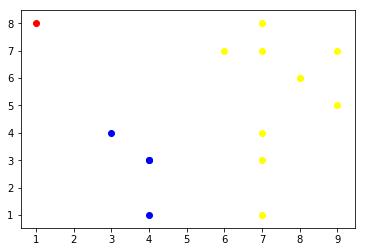

In [21]:
color=['red','blue','yellow','green','cyan','purple','magenta','burlywood','chartreuse']
c=cluster[-n+1]
col=0
for i in c:
    for j in i:
        x=data.iloc[j:j+1,0:1].values
        y=data.iloc[j:j+1,1:2].values
        x=x[0]
        y=y[0]
        plt.scatter(x[0], y[0], color=color[col])
    col+=1
plt.show()